<a href="https://colab.research.google.com/github/jessenb16/Data-Science-Bootcamp-Homework/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-a9f2253fd699>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


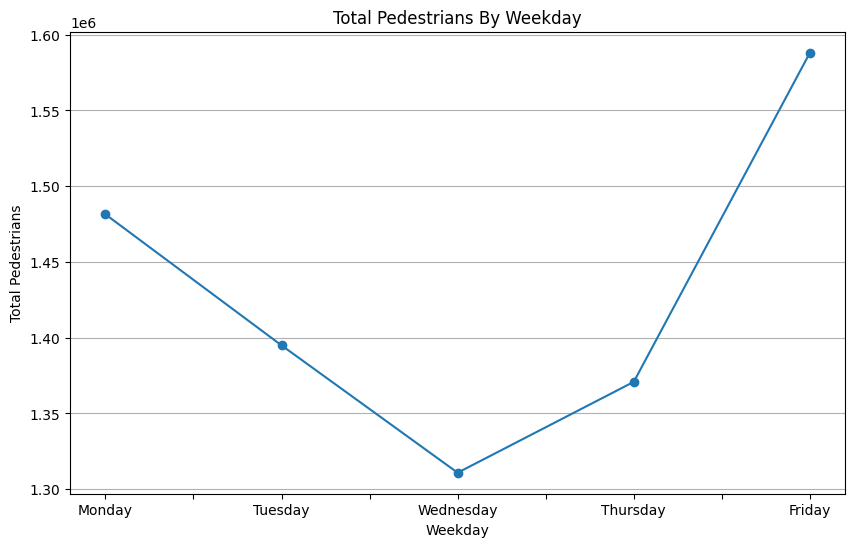

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'

df = pd.read_csv(url)


# 1)Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

weekdays = df[(df['hour_beginning'].dt.dayofweek >= 0) & (df['hour_beginning'].dt.dayofweek <= 4)]

ped_counts_per_day = weekdays.groupby(weekdays['hour_beginning'].dt.day_name())['Pedestrians'].sum()

desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

ped_counts_per_day = ped_counts_per_day.reindex(desired_order)

plt.figure(figsize = (10, 6))
ped_counts_per_day.plot(kind='line', marker='o')
plt.title('Total Pedestrians By Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Pedestrians')
plt.grid(axis = 'y')
plt.show()






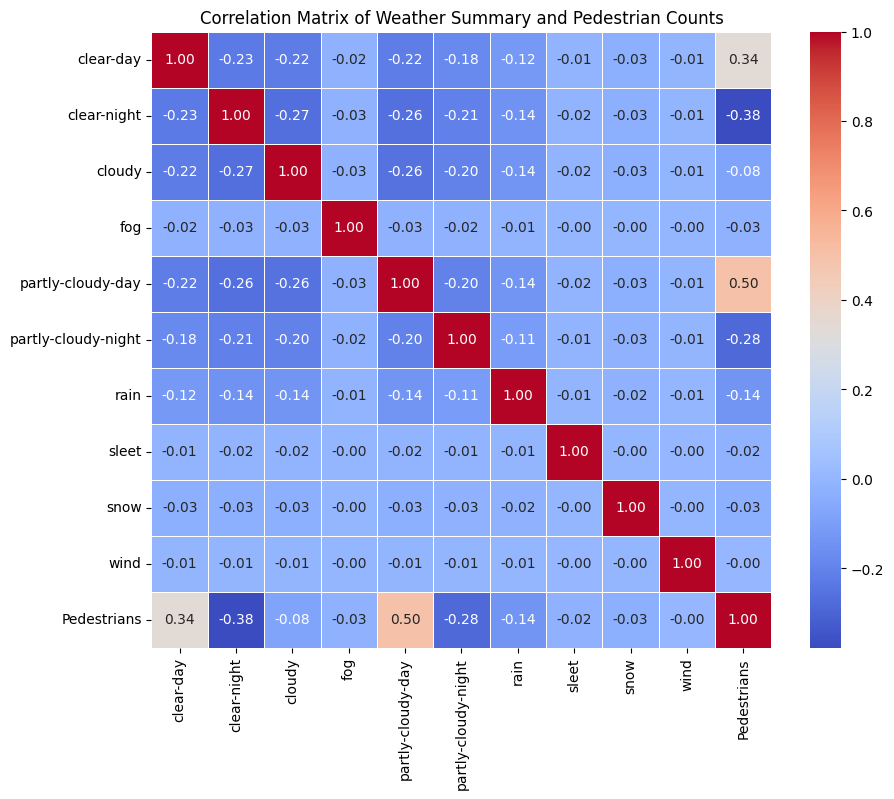

In [3]:
# 2) Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

ped_count_2019 = df[(df['hour_beginning'].dt.year == 2019)]

encoded_weather = pd.get_dummies(ped_count_2019['weather_summary'])

encoded_data = pd.concat([encoded_weather, ped_count_2019['Pedestrians']], axis = 1 )

correlation_matrix = encoded_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Weather Summary and Pedestrian Counts')
plt.show()



In [4]:
# 3) Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

ped_counts_per_time_of_day = df.groupby('time_of_day')['Pedestrians'].sum()

print("Pedestrian Activity Patterns Throughout the Day:")
print(ped_counts_per_time_of_day)


Pedestrian Activity Patterns Throughout the Day:
time_of_day
Afternoon    6803093
Evening      1710794
Morning      2466776
Night          52203
Name: Pedestrians, dtype: int64
